In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


#importing the necessary library

In [2]:
#reading the data

df=pd.read_csv(r'C:\\Users\\HP\Downloads\used_device_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

We gat Missing Value ✅✅

In [3]:
#columns info!

import sketch

df.sketch.ask('Can you give me friendly names and singles sentence descriptions of each columns (format output as HTML Price list)')

In [4]:
#table


df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
from colorama import Fore

In [6]:
print(Fore.GREEN,'the dataset is made up of',df.shape[0],'rows and',df.shape[1],'Columns')

 the dataset is made up of 3454 rows and 15 Columns


In [7]:
#let create a func

for i in df.columns:
    print(Fore.RED,f'{i}:{df[i].nunique()}')

 device_brand:34
 os:4
 screen_size:142
 4g:2
 5g:2
 rear_camera_mp:41
 front_camera_mp:37
 internal_memory:15
 ram:12
 battery:324
 weight:555
 release_year:8
 days_used:924
 normalized_used_price:3094
 normalized_new_price:2988


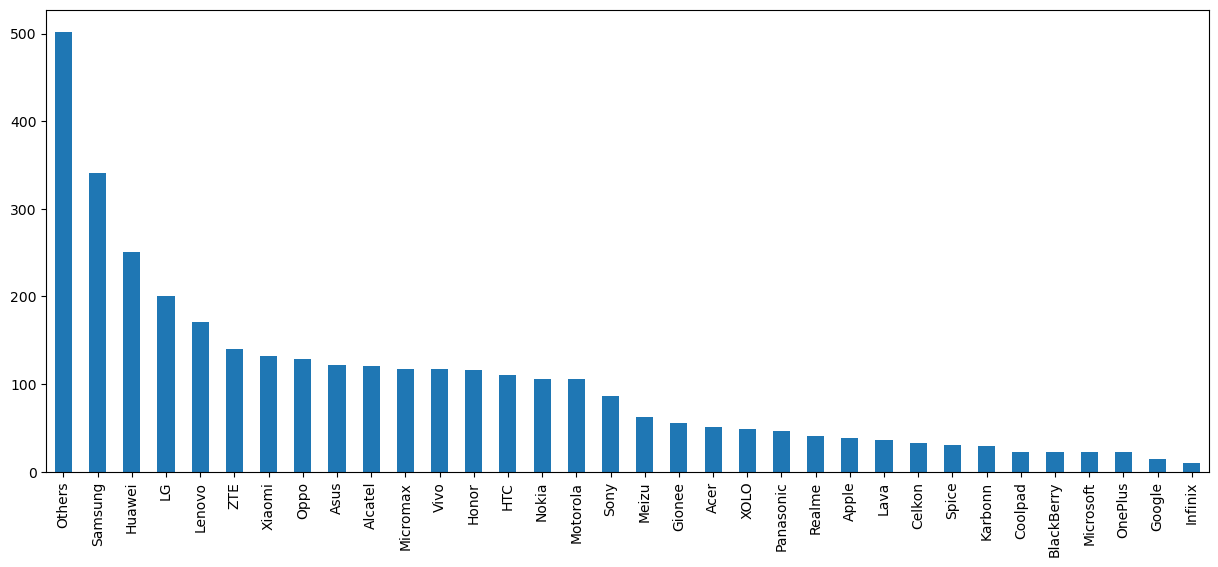

<Figure size 1500x600 with 0 Axes>

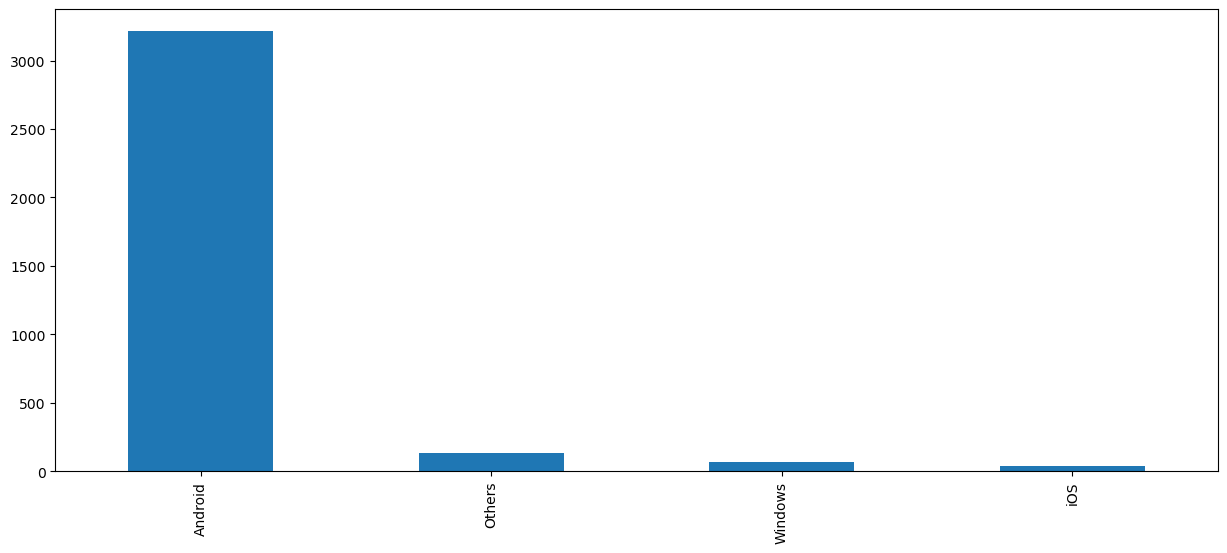

<Figure size 1500x600 with 0 Axes>

In [8]:
Label=['device_brand','os']

for i in Label:
    plt.figure(figsize=(15,6))
    df[i].value_counts().plot(kind='bar')
    df[i].value_counts().plot(kind='bar')
    plt.figure(figsize=(15,6))

In [9]:
num_df=df.select_dtypes('number')

<AxesSubplot:title={'center':'Missing Values'}>

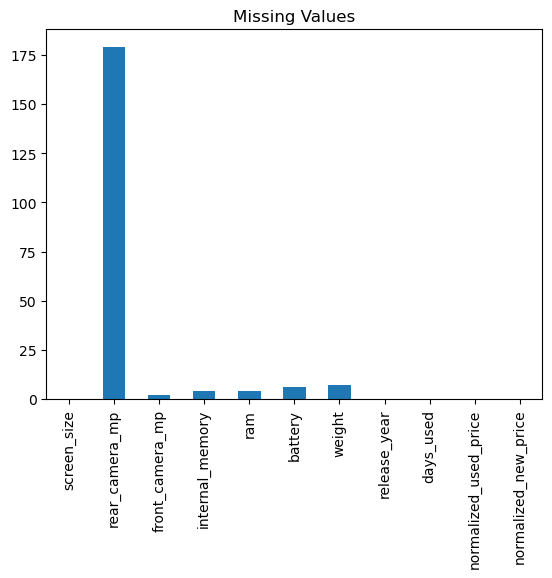

In [10]:
#let plot out the Missing Value 

num_df.isnull().sum().plot.bar(title='Missing Values')

#rear Cemera_mp columns gat More misisng values, but i will just drop the missing rows

In [11]:
df=df.dropna()

#Dropna funvtion been saving lilfe

In [12]:
#new datashappe

print(Fore.RED,f'The New data shape is ',df.shape)

 The New data shape is  (3253, 15)


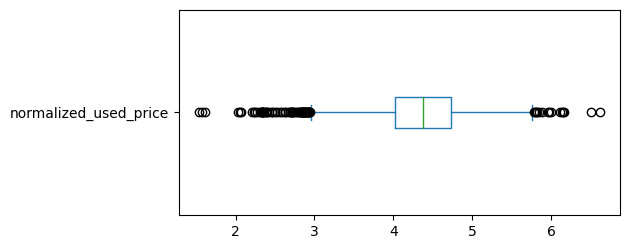

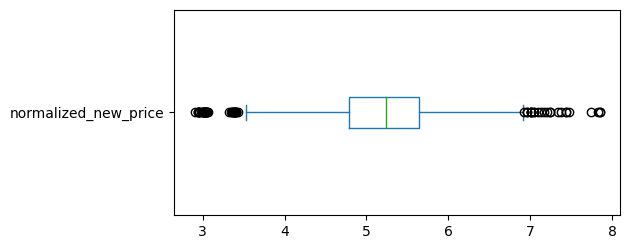

<Figure size 640x480 with 0 Axes>

In [13]:
num_df=df.select_dtypes('number')

Labels=['normalized_used_price','normalized_new_price']

for i in Labels:
    plt.subplot(1,1,1)
    df[i].plot.box(vert=False)
    plt.subplot(2,1,2)
    df[i].plot.box(vert=False)
    plt.tight_layout()
    plt.figure()

<AxesSubplot:ylabel='Density'>

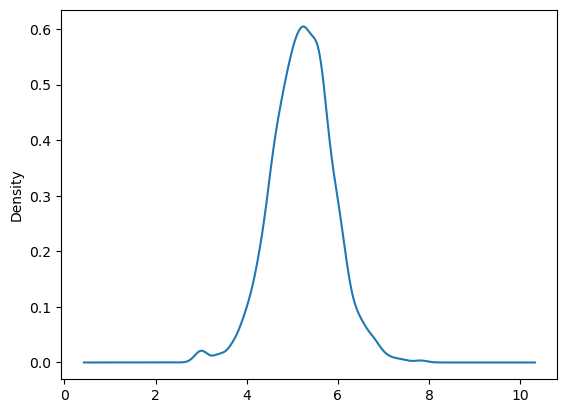

In [14]:
df['normalized_new_price'].plot.kde()

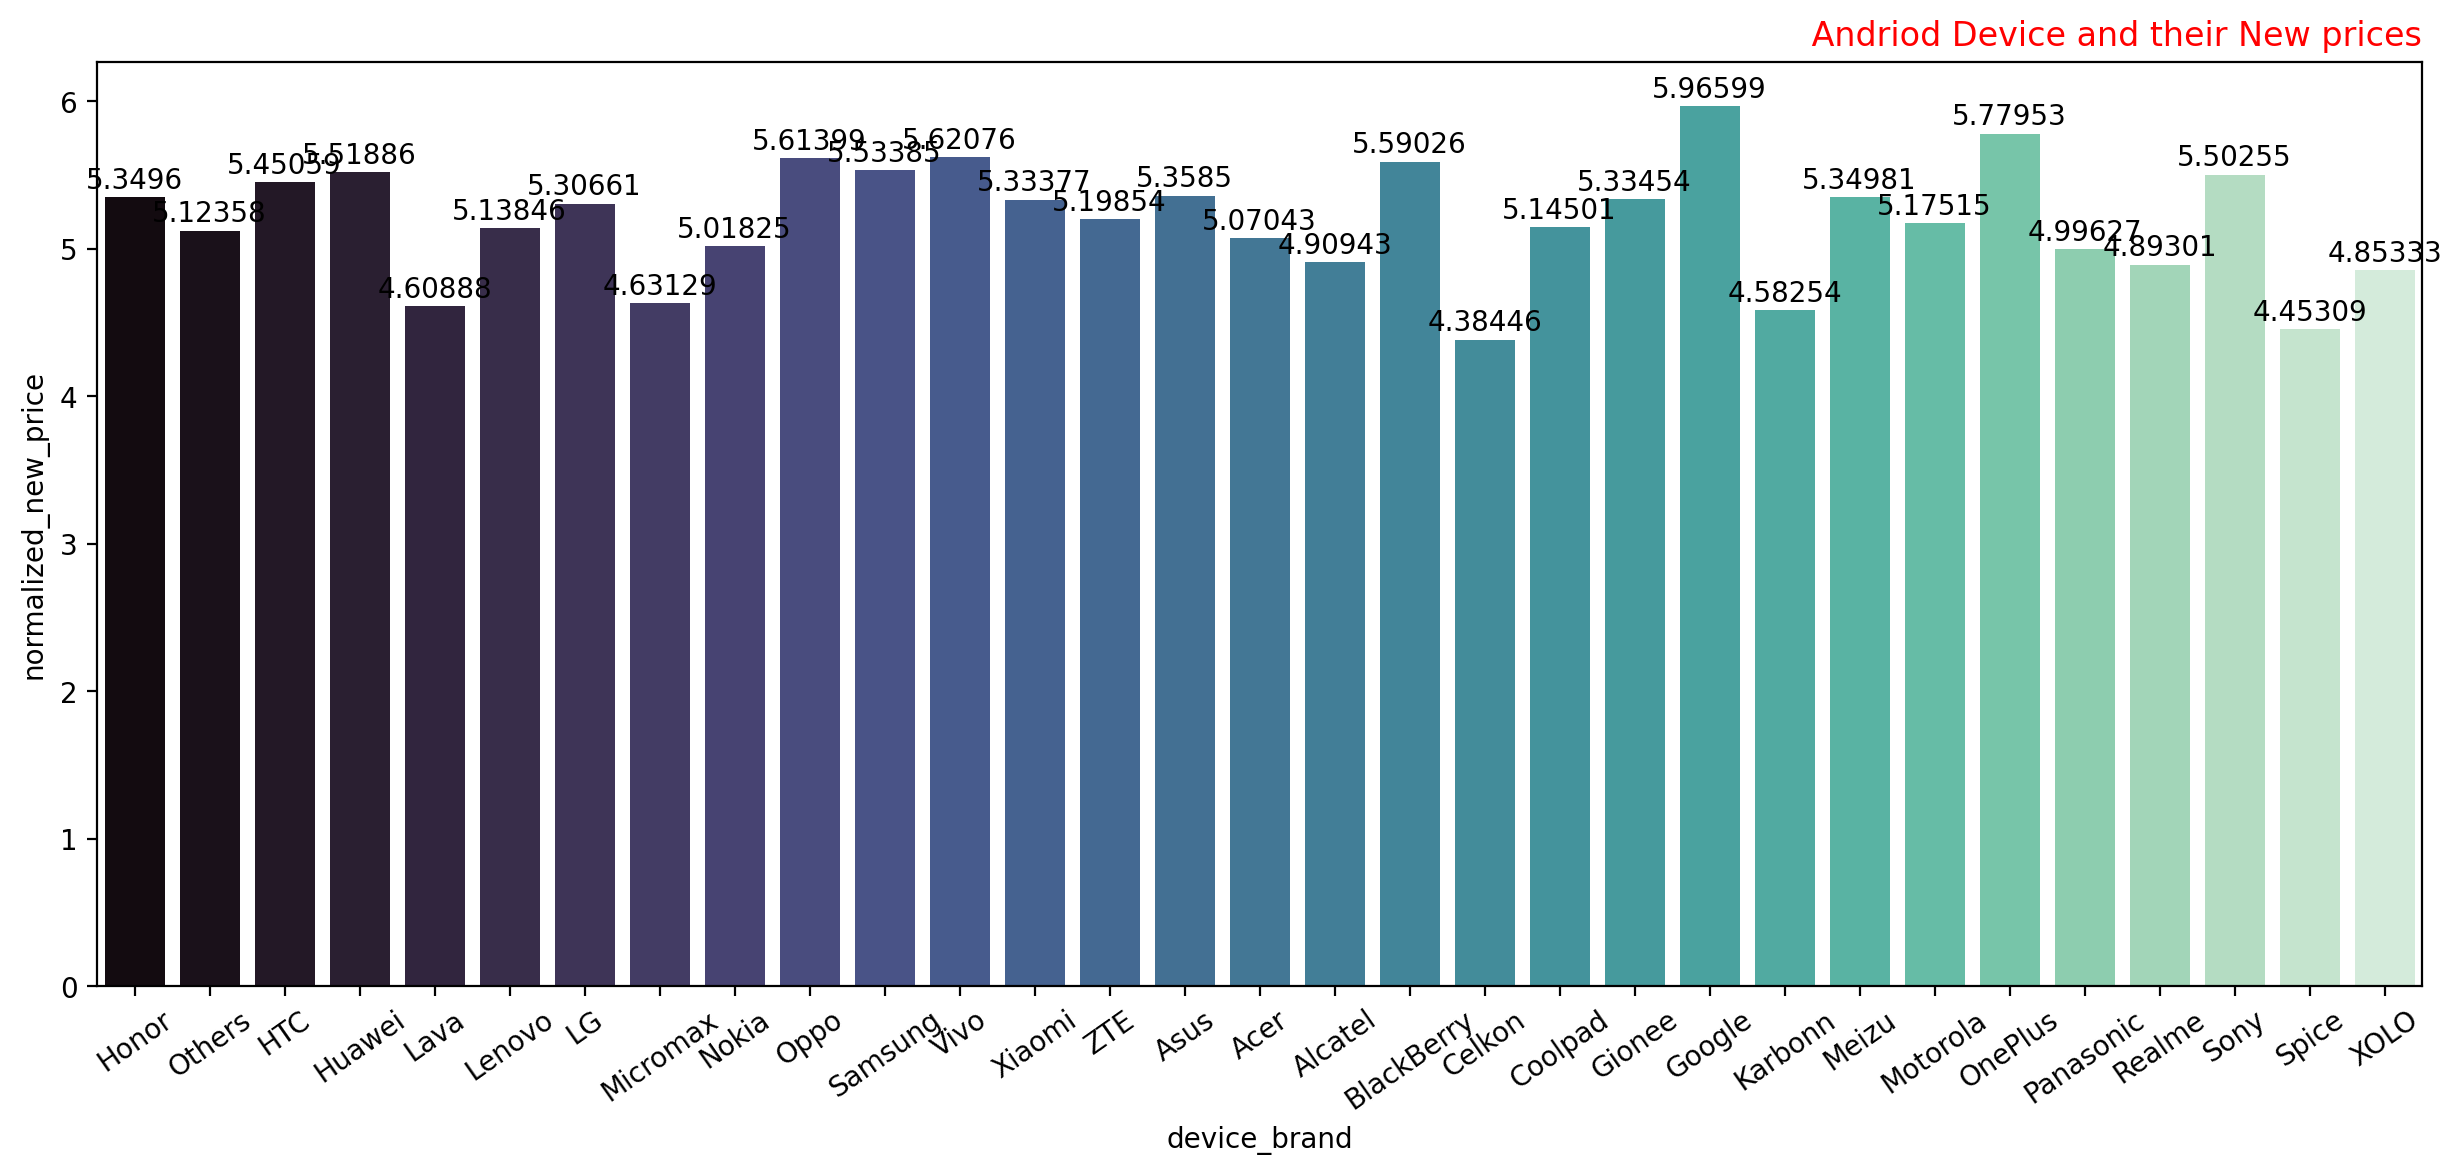

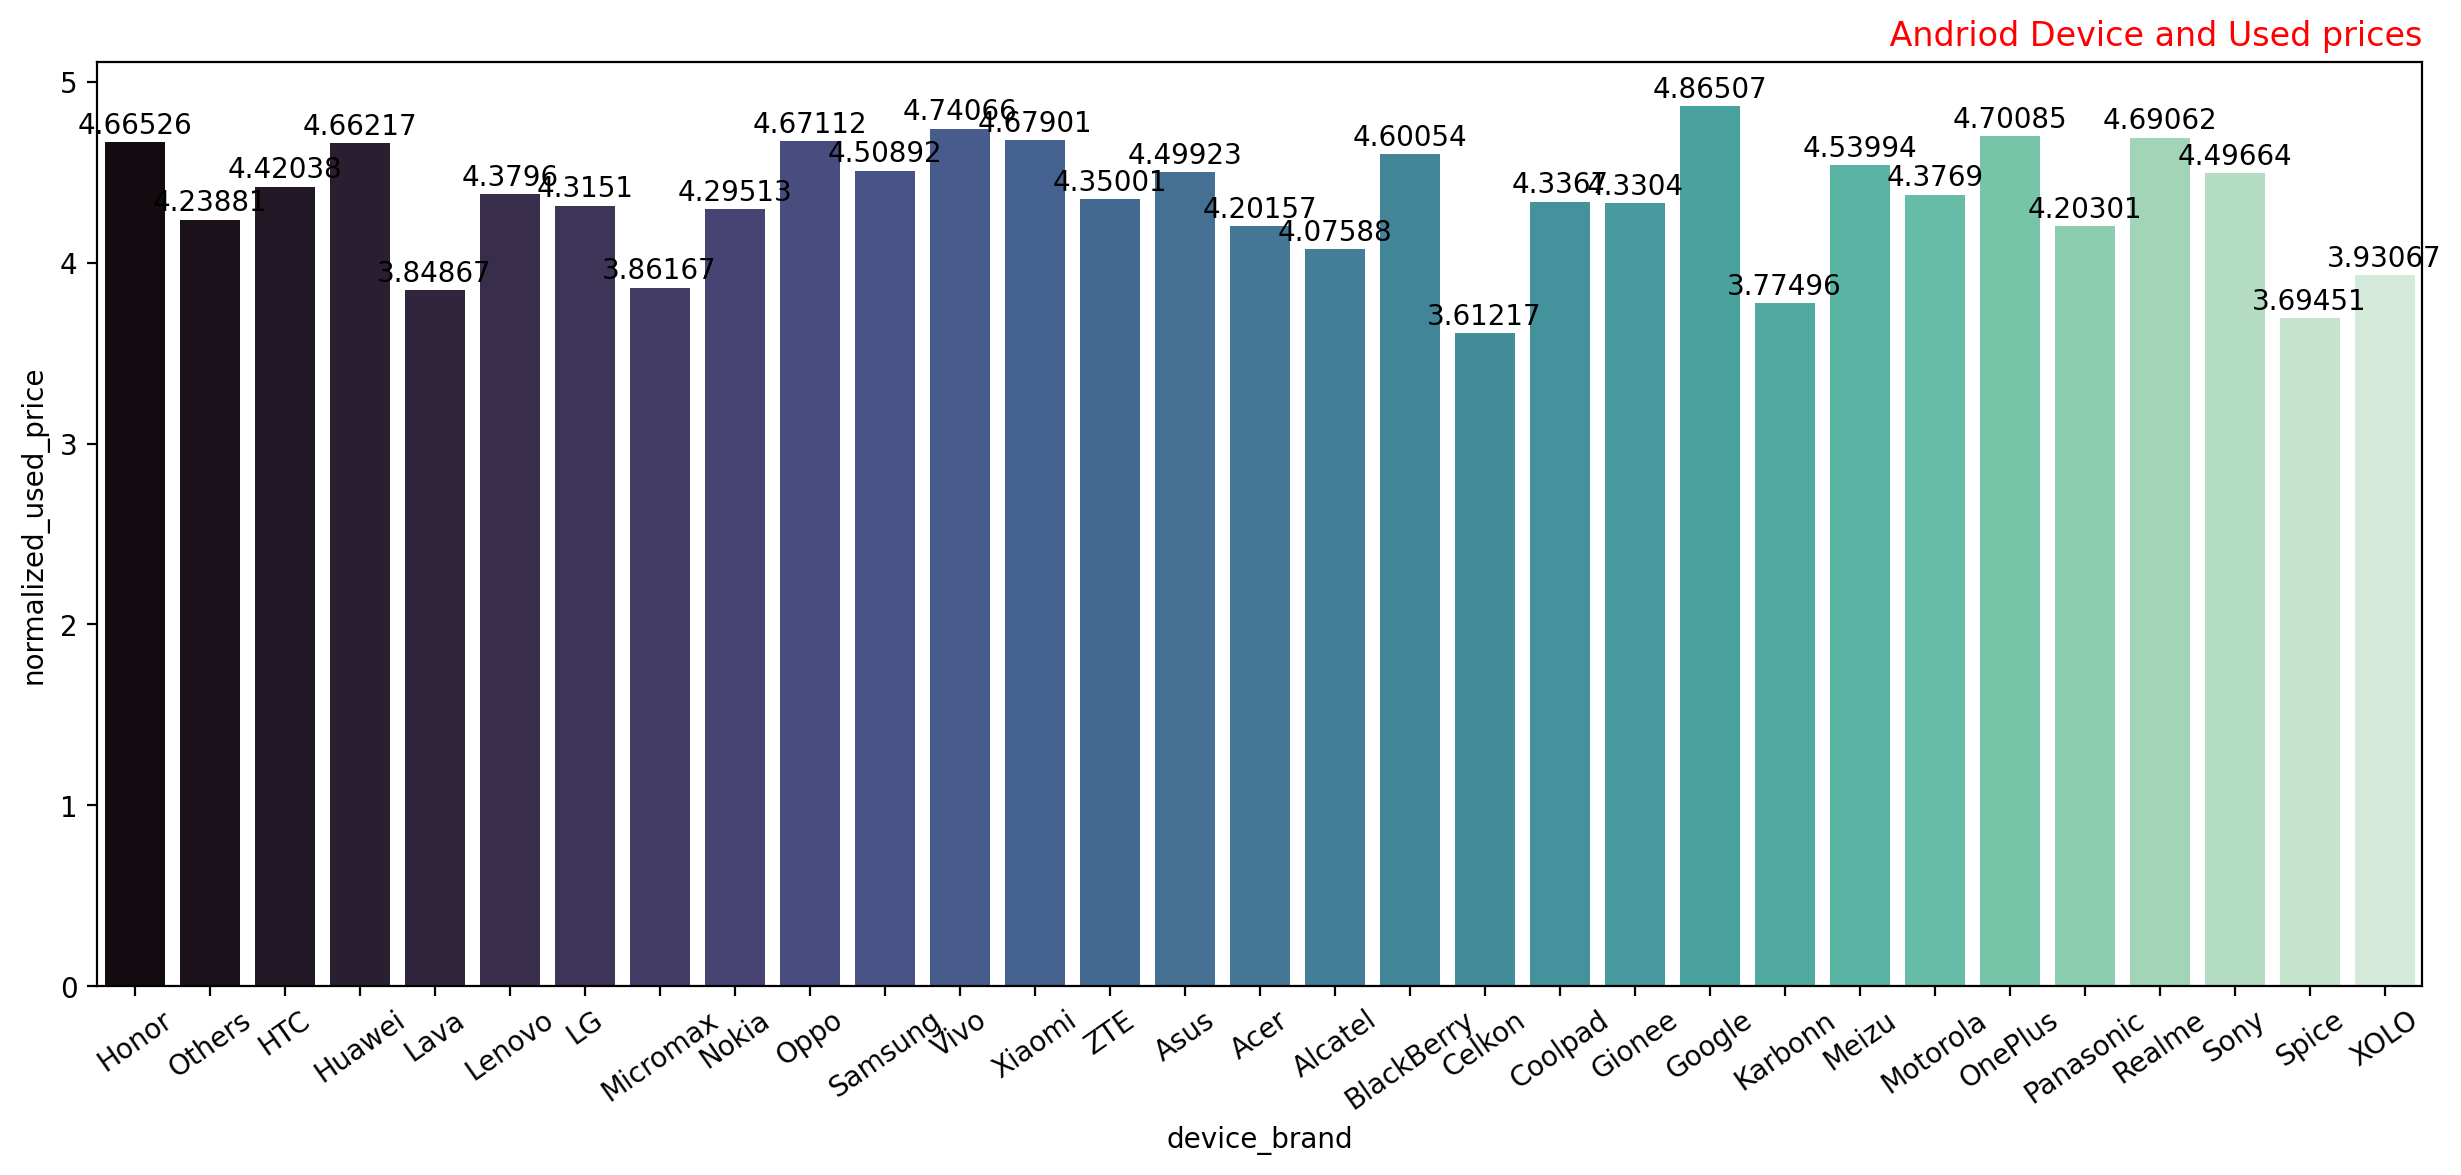

In [15]:
#let Check for the type of brand that has High cost and Low Cost

plt.figure(figsize=(15,6),dpi=200)
fig=sns.barplot(data=df[df['os']=='Android'],x='device_brand',y='normalized_new_price',palette='mako',ci=None)
plt.title(' Andriod Device and their New prices',loc='right',c='r')
plt.xticks(rotation=35)

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

plt.figure(figsize=(15,6),dpi=200)
fig=sns.barplot(data=df[df['os']=='Android'],x='device_brand',y='normalized_used_price',palette='mako',ci=None)
plt.title(' Andriod Device and Used prices',loc='right',c='r')
plt.xticks(rotation=35);


for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1);

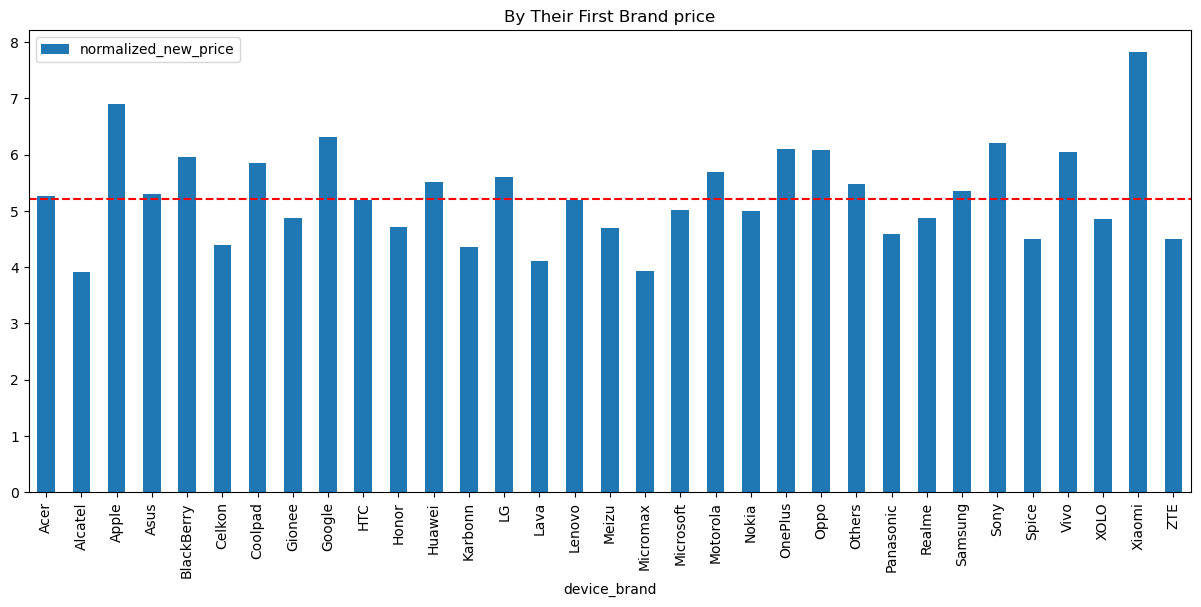

In [16]:
df[['device_brand','normalized_new_price']].groupby('device_brand').first().plot.bar(figsize=(15,6),title='By Their First Brand price')
plt.axhline(df['normalized_new_price'].mean(),ls='--',color='red')


The brand price That beat The RED DOT Line in selling Prices are fones that tend to be costly/expensive in the Market,irrespective of the model of the device brand.

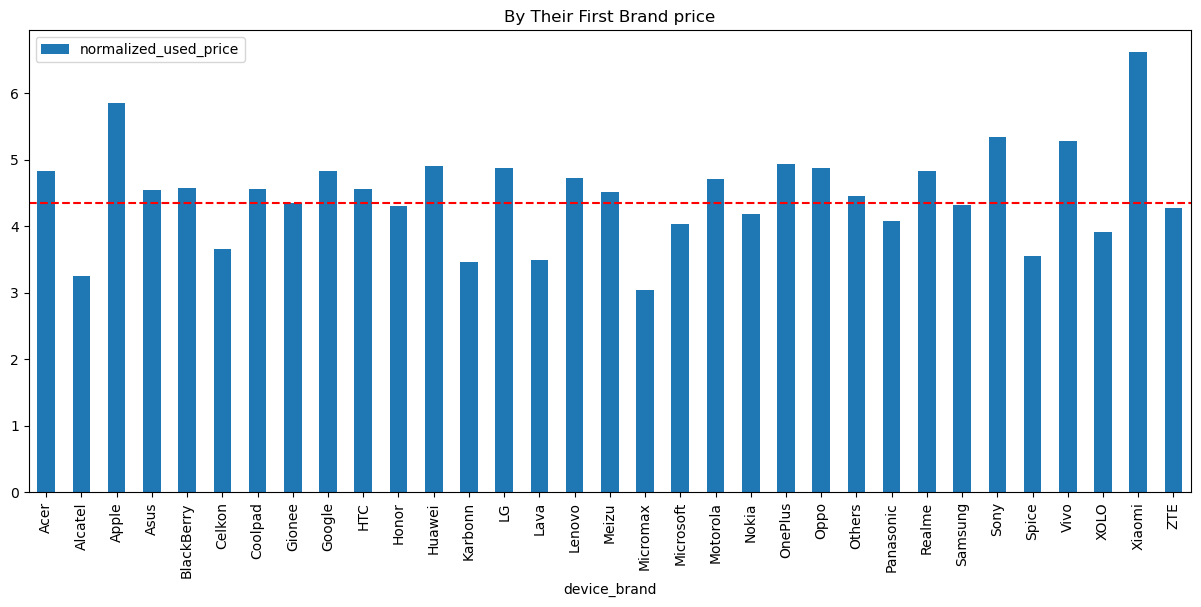

In [17]:
df[['device_brand','normalized_used_price']].groupby('device_brand').first().plot.bar(figsize=(15,6),title='By Their First Brand price')
plt.axhline(df['normalized_used_price'].mean(),ls='--',color='red')

The brand price That beat The RED DOT Line in used_selling_Prices are fones that tend to be costly/expensive in the Market,irrespective of the model of the device brand.

suprising that Xaiomi till maintain the high Prices 🙄🙄 

what make the Phones more costly than the Others????

In [18]:
#so here, we focusing our attention to Andriod phones alone

devices_brand=df[df['os']=='Android']

devices_brand.sample(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
89,LG,Android,15.37,yes,no,8.0,13.0,32.0,3.0,4000.0,194.0,2019,512,4.550608,5.304299
3430,Samsung,Android,12.88,yes,no,12.0,5.0,16.0,2.0,3000.0,149.0,2019,332,4.153399,4.442534
2932,Xiaomi,Android,15.70,yes,no,13.0,20.0,256.0,4.0,4000.0,182.0,2018,390,4.906459,5.668432
1774,LG,Android,10.29,yes,no,5.0,1.3,16.0,4.0,2460.0,126.0,2013,910,4.236712,5.308466
2286,Others,Android,10.29,no,no,5.0,2.0,32.0,4.0,2500.0,138.0,2015,890,4.057853,4.603869
2995,Xiaomi,Android,12.70,yes,no,13.0,8.0,16.0,4.0,3080.0,149.0,2014,623,4.711780,5.436861
2381,Samsung,Android,15.24,yes,no,12.0,8.0,64.0,4.0,3300.0,178.0,2018,504,4.830152,5.481971
2336,Others,Android,12.70,no,no,8.0,2.0,16.0,4.0,2100.0,167.0,2014,855,4.044103,4.862135
948,Celkon,Android,12.70,no,no,5.0,0.3,16.0,4.0,1400.0,140.0,2013,1059,3.758172,4.053002
1292,Huawei,Android,15.21,yes,no,13.0,8.0,32.0,4.0,3000.0,155.0,2018,617,4.515574,5.129011


In [19]:
#value count for 4g and 5g devices

print(Fore.RED,devices_brand['4g'].value_counts())
print(Fore.RED,devices_brand['5g'].value_counts())

 yes    2053
no      971
Name: 4g, dtype: int64
 no     2939
yes      85
Name: 5g, dtype: int64


i Gat 2053 fones as 4g why 971 is not 4g, That is total sum of total Dataset.
so it should be believe that we gat the rest 971 has 5g fone.

Plotting for 5g too, and now we gat 85 fones is 5g and the rest 2939 is not 5g fone.

there is totally an Imbalance in the fone category.

that is to say in Sum cases we till have fone that dosen't have 4g or 5g network.

Dealing for phone feattures, RAM play a Major Rule, 
The amount of RAM matters across different brands, and it is an important factor for more Granularity  of a device_brand

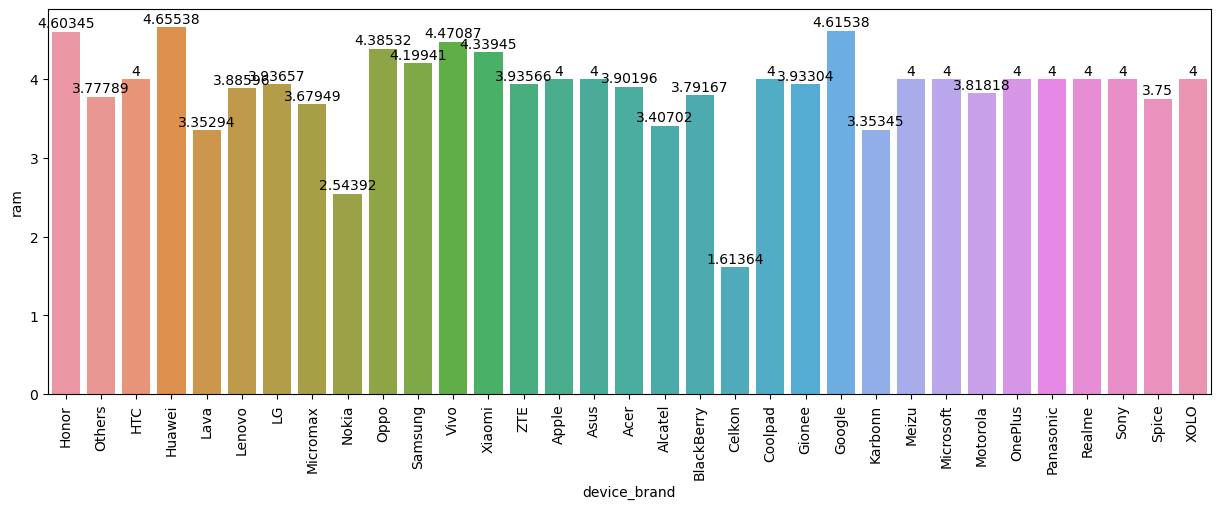

In [20]:
#plotting the devices by rams

plt.figure(figsize=(15, 5))
fig=sns.barplot(data=df, x="device_brand", y="ram",ci=None)
plt.xticks(rotation=90)

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

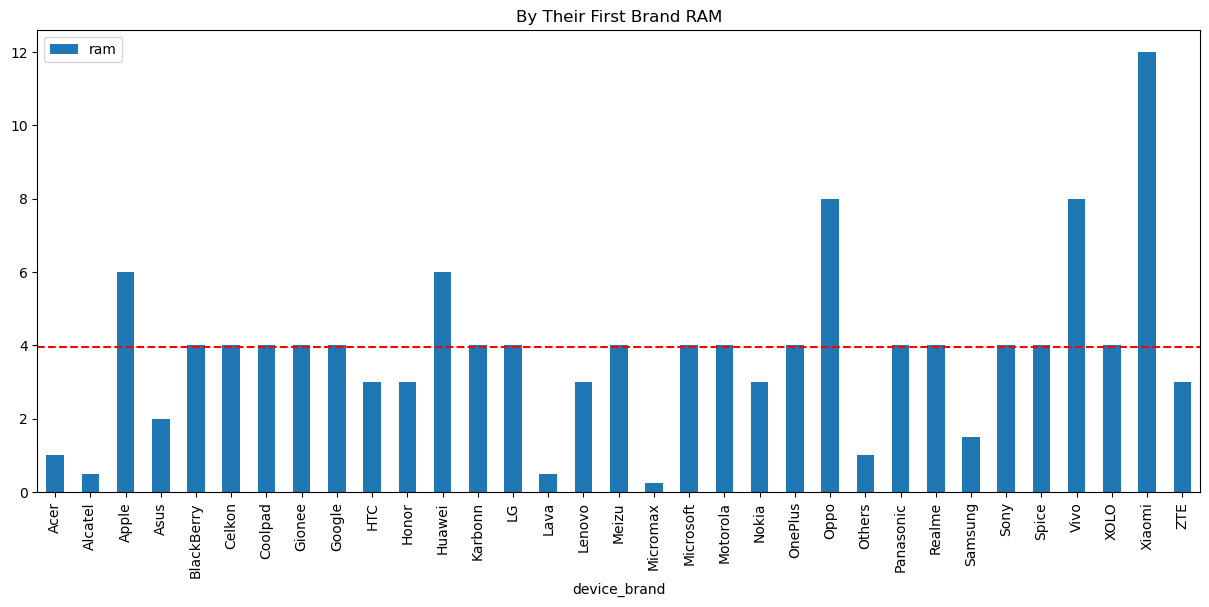

In [21]:
df[['device_brand','ram']].groupby('device_brand').first().plot.bar(figsize=(15,6),title='By Their First Brand RAM')
plt.axhline(df['ram'].mean(),ls='--',color='red')

TOP PHone By Ram:
    
    Xiaomi
    
    Vivo
    
    Oppo
    
    Huaweni
    
    Apple

A good phone weight can vary depending on personal preferences and needs. However, as a general guideline, a good phone weight typically falls within the range of 150-200 grams.

Fone Features is Solid Battey,A Good battery is the one with a capacity of >= 4500 mAh will be able to provide power for a longer duration compared to a battery with a lower capacity. 

The higher the battery capacity, the longer the battery can last before needing to be recharged.

so it better we filter them Out.

<AxesSubplot:title={'center':'Devices by battery'}, xlabel='device_brand'>

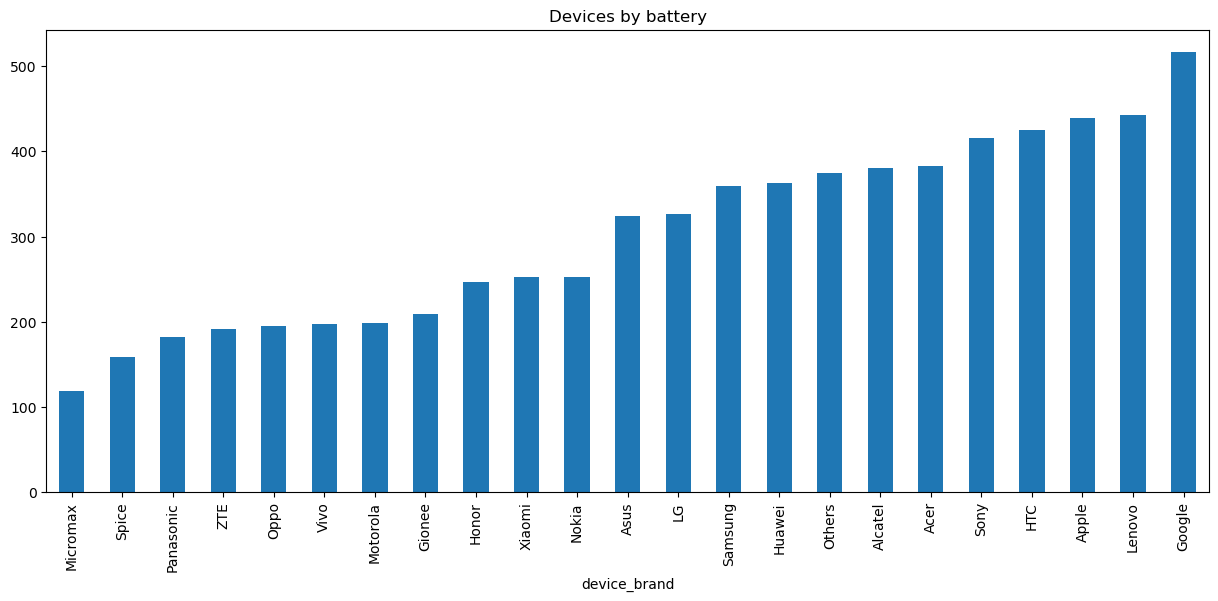

In [22]:
#using The battery capacity to check the weight of the fone??

battery_df=df[df.battery >= 4500]
battery_df.groupby('device_brand')['weight'].mean().sort_values(ascending=True).plot(kind='bar',title='Devices by battery',figsize=(15,6))

Device whose batteryy capacity is more than 4500mAh and by their weight.

A better screen size device phone typically features a larger screen, often ranging from 6 inches to 7 inches or more diagonally. This larger display allows for more content to be displayed at once, making it easier to read text, view images, and watch videos.

To convert inches to centimeters,using the conversion factor of 2.54 centimeters per inch. 

6 inches * 2.54 centimeters/inch = 15.24 centimeters

<AxesSubplot:title={'center':'Phones with Bigger Screens'}>

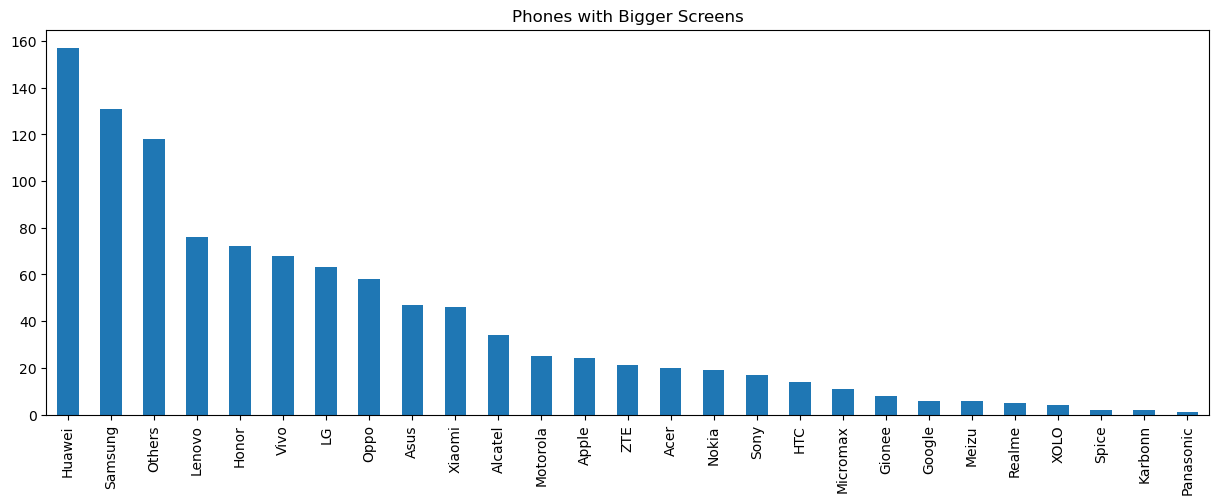

In [23]:
screen_df=df[df['screen_size'] >= 6*2.54]

screen_df['device_brand'].value_counts().plot. bar(figsize=(15,5),title="Phones with Bigger Screens")

Huawei take the lead as the fones with Bigger screens, follow by samsung,and others

In [24]:
df["device_category"] = pd.cut(x=df['normalized_new_price'],bins=[-np.infty, 4, 6, np.infty],
                               labels=["Budget", "Mid-ranger", "Premium"])

In [25]:
df['device_category'].value_counts()

Mid-ranger    2805
Premium        335
Budget         113
Name: device_category, dtype: int64

In [26]:
df['normalized_new_price'].unique()

array([4.71510025, 5.51901794, 5.88463072, ..., 6.25153773, 4.62418819,
       4.27999391])

In [27]:
df.query('device_category=="Mid-ranger"')

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,Mid-ranger
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,Mid-ranger
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,Mid-ranger
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,Mid-ranger
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,Mid-ranger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,Samsung,Android,14.81,yes,no,8.0,5.0,32.0,2.0,3000.0,141.0,2019,383,4.191320,4.309187,Mid-ranger
3444,Apple,iOS,10.34,yes,no,12.0,7.0,64.0,3.0,1821.0,148.0,2020,235,5.011901,5.875352,Mid-ranger
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,Mid-ranger
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188,Mid-ranger


<AxesSubplot:xlabel='device_category', ylabel='4g'>

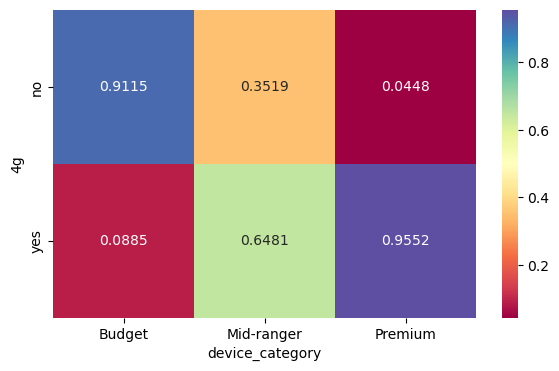

In [28]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral")

more OF YES and NO in the Premium and Budget,they gat a good relationship.

<AxesSubplot:xlabel='device_category', ylabel='5g'>

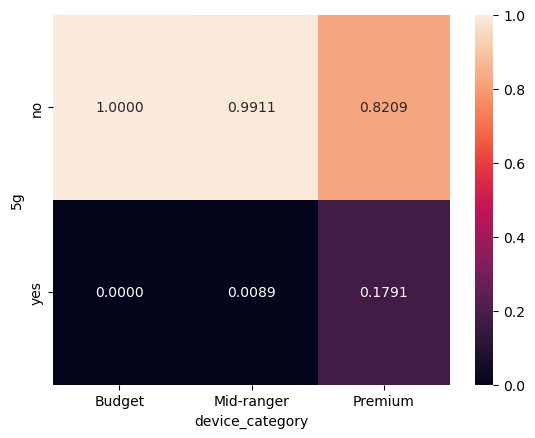

In [35]:
sns.heatmap(pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f")

NO and Premium gat a good relationship, that is under 5g we gat few Yes.

In [37]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_category
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,Mid-ranger
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,Mid-ranger
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,Mid-ranger
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,Mid-ranger
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,Mid-ranger


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
code=LabelEncoder()

In [40]:
df['4g']=code.fit_transform(df['4g'])
df['5g']=code.fit_transform(df['5g'])
df['os']=code.fit_transform(df['os'])
df['device_brand']=code.fit_transform(df['device_brand'])

In [41]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_category
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,Mid-ranger
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,Mid-ranger
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,Mid-ranger
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,Mid-ranger
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,Mid-ranger


<AxesSubplot:>

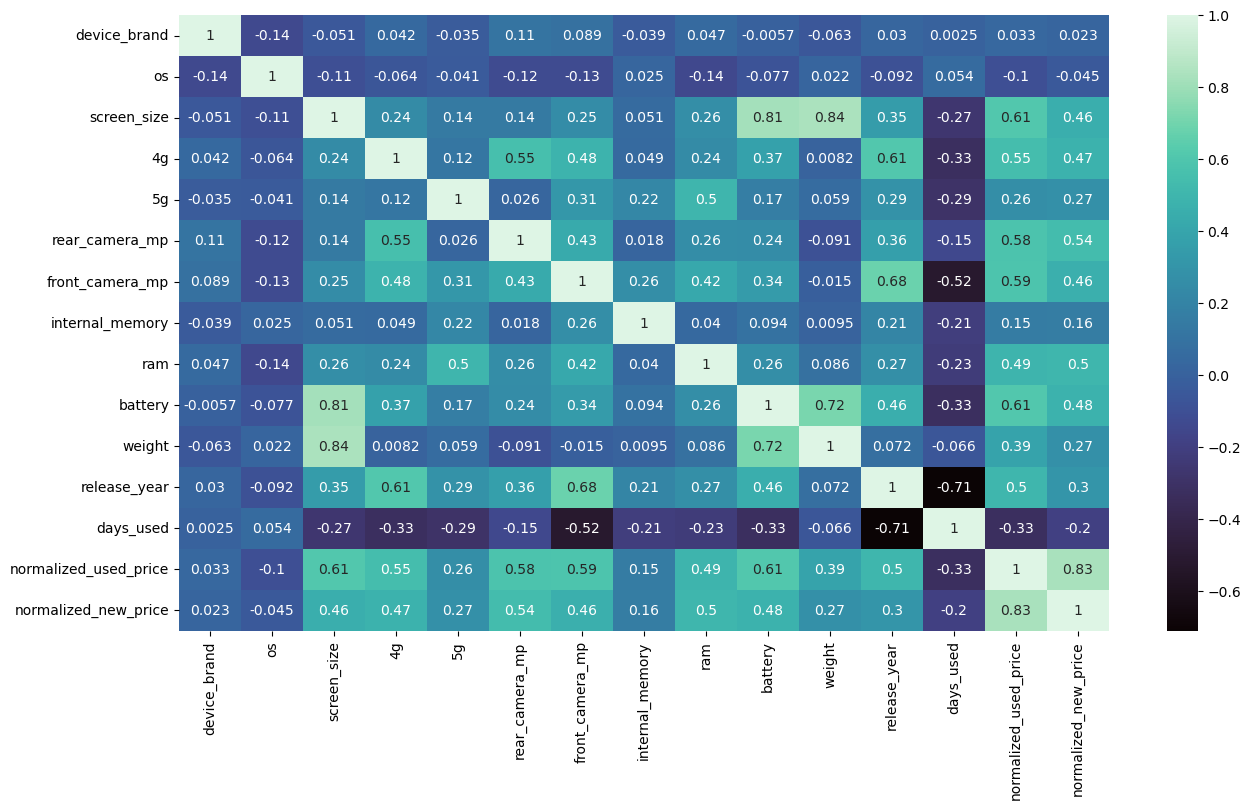

In [42]:
#checing for correlation 

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='mako')

In [43]:
#ML

#let import the necessary Library for ML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
#assignng the new value and the X and y

X=df.drop(['normalized_new_price','device_category'],axis=1)

y=df['normalized_new_price']

In [45]:
#Splitting the value

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=101)
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [46]:
#Calling on the model

model=LinearRegression()

In [47]:
model.fit(X_train,y_train)

LinearRegression()

In [48]:
pd.DataFrame(data=model.coef_,columns=['weight'],index=X.columns).sort_values('weight',ascending=False)

,weight
normalized_used_price,0.887956
5g,0.268559
4g,0.164130
os,0.067272
ram,0.061908
rear_camera_mp,0.009959
screen_size,0.006215
internal_memory,0.000494
front_camera_mp,0.000121
battery,0.000039


In [49]:
#Importing the Evaluation libraries

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:


#let check for the level of their fittness

test_prediction=model.predict(X_test)

print('Mean Absolute Error: %.2f'%mean_absolute_error(y_test,test_prediction))
print('Mean Square Erroe: %.2f'%mean_squared_error(y_test,test_prediction))
print('Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,test_prediction)))
print('R_Squared:%.2f'% r2_score(y_test,test_prediction))

Mean Absolute Error: 0.27
Mean Square Erroe: 0.12
Root Mean Square Error:0.35
R_Squared:0.73


In [54]:
#models

from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [55]:
#i Imported a butch of Libraries

models=[]

models.append(('BaggClassier',BaggingRegressor()))
models.append(('RandomRegressor',RandomForestRegressor()))
models.append(('ExtraRegressor',ExtraTreesRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
models.append(('KNR',KNeighborsRegressor()))

In [56]:
#importing Cross validation method

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [57]:
#we Kfold and Scoring metrics

fold=KFold(n_splits=5)
scoring='neg_mean_squared_error'

In [58]:
#Evauating Each Model


results=[] 
names=[]

for name,modell in models:
    cv_result=cross_val_score(modell,X_train,y_train,cv=fold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    final='%s: %f (%f)' % (name,cv_result.mean(),cv_result.std())
    print(final)

BaggClassier: -0.099599 (0.007755)
RandomRegressor: -0.089934 (0.005260)
ExtraRegressor: -0.085544 (0.005272)
DecisionTree: -0.168709 (0.007137)
SVR: -0.284920 (0.019663)
KNR: -0.271185 (0.012437)


ExtraRegressor seems to be the lowest Nen_mean_squared_Error follow by RandomRegressor

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'BaggClassier'),
  Text(2, 0, 'RandomRegressor'),
  Text(3, 0, 'ExtraRegressor'),
  Text(4, 0, 'DecisionTree'),
  Text(5, 0, 'SVR'),
  Text(6, 0, 'KNR')])

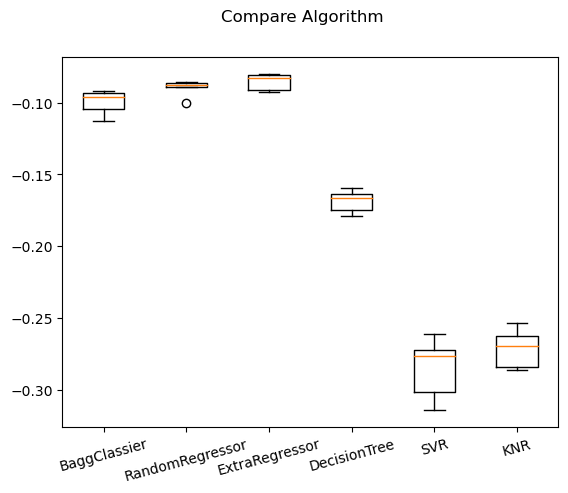

In [69]:
fig=plt.figure()
fig.suptitle('Compare Algorithm')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=15)

In [64]:
#using that aprticular model

model_1=ExtraTreesRegressor()
model_1.fit(X_train,y_train)

ExtraTreesRegressor()

In [65]:
#EValuating the test_prediction

test_prediction=model_1.predict(X_test)

In [68]:
#metrics scores

print(Fore.RED,'Mean Absolute Error: %.2f'%mean_absolute_error(y_test,test_prediction))
print(Fore.YELLOW,'Mean Square Erroe: %.2f'%mean_squared_error(y_test,test_prediction))
print(Fore.BLUE,'Root Mean Square Error:%.2f'%np.sqrt(mean_squared_error(y_test,test_prediction)))
print(Fore.CYAN,'R_Squared:%.2f'% r2_score(y_test,test_prediction))

 Mean Absolute Error: 0.23
 Mean Square Erroe: 0.09
 Root Mean Square Error:0.30
 R_Squared:0.80


Before Dumping it into pickle let push it into Comet_ml

In [70]:
import comet_ml

In [71]:
exp=comet_ml.init()

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ········


COMET INFO: Valid Comet API Key saved in C:\Users\HP\.comet.config (set COMET_CONFIG to change where it is saved).


In [72]:
def evaluate(y_test,test_prediction):
    return {'MAE':mean_absolute_error(y_eval,test_prediction),
           'MSE':np.sqrt(mean_squared_error(y_eval,test_prediction)),
           'RS':r2_score(y_eval,test_prediction)}

In [78]:
y_train_pred=model_1.predict(X_train)
with exp.train():
    metrics=evaluate(y_train,test_prediction)
    exp.log_metrics(metrics)

In [79]:
y_test_pred=model_1.predict(X_test)
with exp.test():
    metrics=evaluate(y_test,test_prediction)
    exp.log_metrics(metrics)

In [80]:
exp.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yekindata-analysis/phone-price-prediction/900ce8a36fac4e4abe42066b99ea896e
COMET INFO:   Metrics:
COMET INFO:     test_MAE  : 0.22673723331763448
COMET INFO:     test_MSE  : 0.3001245680745243
COMET INFO:     test_RS   : 0.7984322340285076
COMET INFO:     train_MAE : 0.22673723331763448
COMET INFO:     train_MSE : 0.3001245680745243
COMET INFO:     train_RS  : 0.7984322340285076
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename           

In [77]:
exp=comet_ml.Experiment(project_name='Phone Price prediction_')

exp

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yekindata-analysis/phone-price-prediction/3323ed47c909450b99ef55107ca67b75
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: To get all

In [81]:
#let Save our Model

import pickle as pk

In [85]:
with open('model_1.pk','wb') as file:
    pk.dump(model_1,file)

In [86]:
exp.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yekindata-analysis/general/234b5aa751f64dabb661b17f9d1fdcff
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET INFO: Uploading 1 metrics, params 